   Run Scored  Wicket Lost  Result  Crisp Result  Fuzzy Result
0       187.0          9.0       0             0           0.0
1       190.0          5.0       1             0           0.6
2        97.0          0.0       1             0           0.0
3        96.0         10.0       0             0           0.0
4       188.0          4.0       1             1           0.8


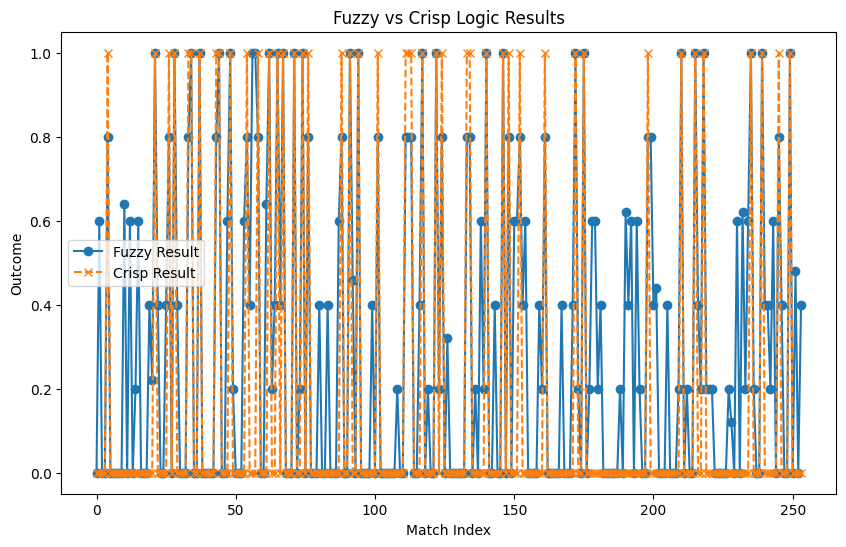

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('asiacup.csv')

# Preprocessing
data['Result'] = data['Result'].apply(lambda x: 1 if x.lower() == 'win' else 0)

# Features
X = data[['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras']].values
y = data['Result'].values.reshape(-1, 1)

# Crisp Logic - Threshold-based decision
def crisp_logic(run_scored, wicket_lost):
    if run_scored > 150 and wicket_lost < 5:
        return 1  # Win
    else:
        return 0  # Lose

# Fuzzy Logic - Membership functions
def fuzzy_run_scored(run_scored):
    if run_scored <= 100:
        return 0.0
    elif 100 < run_scored <= 150:
        return (run_scored - 100) / 50
    else:
        return 1.0

def fuzzy_wicket_lost(wicket_lost):
    if wicket_lost >= 8:
        return 0.0
    elif 3 <= wicket_lost < 8:
        return (8 - wicket_lost) / 5
    else:
        return 1.0

def fuzzy_decision(run_scored, wicket_lost):
    fuzzy_run = fuzzy_run_scored(run_scored)
    fuzzy_wickets = fuzzy_wicket_lost(wicket_lost)
    
    return min(fuzzy_run, fuzzy_wickets)

# Apply crisp and fuzzy logic
data['Crisp Result'] = data.apply(lambda row: crisp_logic(row['Run Scored'], row['Wicket Lost']), axis=1)
data['Fuzzy Result'] = data.apply(lambda row: fuzzy_decision(row['Run Scored'], row['Wicket Lost']), axis=1)

# Results comparison
print(data[['Run Scored', 'Wicket Lost', 'Result', 'Crisp Result', 'Fuzzy Result']].head())

# Plotting Fuzzy vs Crisp Result
plt.figure(figsize=(10,6))
plt.plot(data['Fuzzy Result'], label='Fuzzy Result', marker='o')
plt.plot(data['Crisp Result'], label='Crisp Result', linestyle='--', marker='x')
plt.legend()
plt.xlabel('Match Index')
plt.ylabel('Outcome')
plt.title('Fuzzy vs Crisp Logic Results')
plt.show()
